In [ ]:
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Load training data
train_images = pd.read_csv("/content/drive/MyDrive/ML/csvTrainImages 13440x1024.csv", header=None).values
train_labels = pd.read_csv("/content/drive/MyDrive/ML/csvTrainLabel 13440x1.csv", header=None).values

test_images = pd.read_csv("/content/drive/MyDrive/ML/csvTestImages 3360x1024.csv", header=None).values
test_labels = pd.read_csv("/content/drive/MyDrive/ML/csvTestLabel 3360x1.csv", header=None).values


class_names = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']


# normalization
train_images = train_images / 255
test_images = test_images / 255

# unique classes & their number
unique_classes, count = np.unique(train_labels, return_counts=True)
number_of_classes = len(unique_classes)
print("Number of unique classes is", number_of_classes)

# Distribution of samples in each class
for i, j in zip(unique_classes, count):
    print(f"Class {i} has {j} samples")

def display_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(32, 32), cmap='gray')
        true_label = class_names[int(true_labels[i])]
        predicted_label = class_names[predicted_labels[i]]

        # Check if the true label is not equal to the predicted label
        if true_label != predicted_label:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='red')
        else:
            plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color='black')

        plt.axis('off')
    plt.show()


Mounted at /content/drive
Number of unique classes is 28
Class 1 has 480 samples
Class 2 has 480 samples
Class 3 has 480 samples
Class 4 has 480 samples
Class 5 has 480 samples
Class 6 has 480 samples
Class 7 has 480 samples
Class 8 has 480 samples
Class 9 has 480 samples
Class 10 has 480 samples
Class 11 has 480 samples
Class 12 has 480 samples
Class 13 has 480 samples
Class 14 has 480 samples
Class 15 has 480 samples
Class 16 has 480 samples
Class 17 has 480 samples
Class 18 has 480 samples
Class 19 has 480 samples
Class 20 has 480 samples
Class 21 has 480 samples
Class 22 has 480 samples
Class 23 has 480 samples
Class 24 has 480 samples
Class 25 has 480 samples
Class 26 has 480 samples
Class 27 has 480 samples
Class 28 has 480 samples


Confusion matrix for SVM is:
[[113   1   0   0   0   0   0   2   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   1   0   0   1   0]
 [  0  93   9   0   0   0   0   5   1   0   2   0   0   0   0   0   0   1
    0   1   0   0   0   1   7   0   0   0]
 [  0  11  58  30   0   0   0   0   1   2   1   0   1   0   0   1   0   0
    0   2   0   1   0   0  11   0   0   1]
 [  0   4  36  60   0   1   0   2   1   0   1   0   0   0   0   1   0   0
    0   0   1   1   0   0  10   1   0   1]
 [  1   0   1   0  73  13  14   0   0   0   0   0   0   0   0   0   0   9
    2   0   0   0   0   2   0   2   3   0]
 [  1   0   0   0  26  63  16   0   0   0   0   0   0   0   0   1   0   9
    0   0   0   0   0   2   1   0   1   0]
 [  0   0   0   0  19  26  49   1   0   1   1   0   0   0   0   1   0   8
   12   0   0   0   2   0   0   0   0   0]
 [  2   2   0   0   0   0   0  81  22   6   2   0   0   0   0   1   0   0
    0   0   0   0   0   0   1   1   2   0]
 [  5   0   0   0   0   0   0  33  

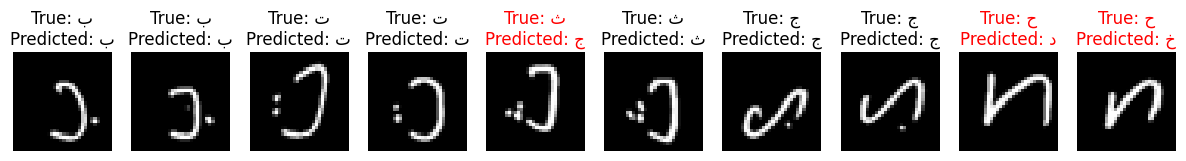

In [ ]:
#First expirement
#SVM

model= SVC(kernel="rbf")
model.fit(train_images,train_labels.ravel())
predicted = model.predict(test_images)


from sklearn.metrics import confusion_matrix
def conMatrix(test_labels, predicted):
  conf_matrix = confusion_matrix(test_labels, predicted)

  AllTP, AllFP , AllFN = [],[],[]

  for i in range (len(conf_matrix)):
      TP = conf_matrix[i][i]
      FP = np.sum(conf_matrix[:, i]) - TP
      FN = np.sum(conf_matrix[i, :]) - TP
      AllTP.append(TP)
      AllFP.append(FP)
      AllFN.append(FN)

  return AllTP, AllFP , AllFN, conf_matrix

def F1(AllTP,AllFP,AllFN):
  TotF1 = []
  for i in range (len(AllTP)):
   Pre = AllTP[i] / (AllTP[i]+ AllFN[i])
   Re = AllTP[i] / (AllTP[i] + AllFN[i])
   f1SC = (2 * Pre * Re) / (Pre + Re)
   TotF1.append(f1SC)
  AVF1 = np.mean(TotF1)

  return AVF1

AllTP, AllFP, AllFN, mtrx = conMatrix(test_labels, predicted)
print("Confusion matrix for SVM is:")
print(mtrx)
Av = F1(AllTP, AllFP, AllFN)
Av = round(Av * 100, 2)
print("F1 score for SVM:", Av, "%")


display_images(test_images, test_labels, predicted)


In [ ]:
#Splitting the data
ImgTraining, ImgValidation, LabelTraining, LabelValidation = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


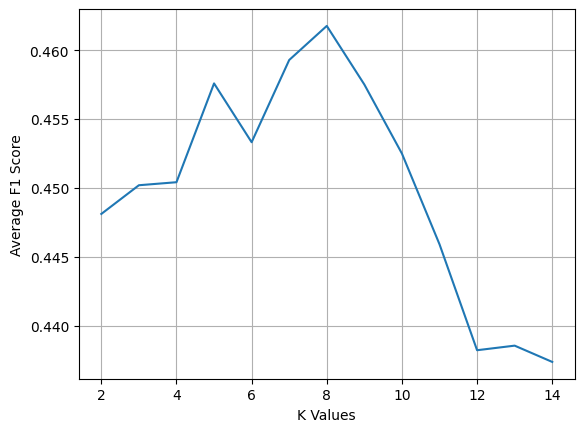

Best K value is 8.

Average Accuracies: 44.85%
Confusion matrix for the best K value:
[[117   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0  89  12   4   0   0   0   9   1   0   0   0   0   0   0   0   0   1
    0   0   0   1   0   0   3   0   0   0]
 [  0  35  48  25   0   0   0   3   1   3   0   0   0   0   0   0   0   0
    0   3   0   0   0   0   2   0   0   0]
 [  0  28  47  35   0   0   0   4   1   2   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   3   0   0   0]
 [  0   0   2   2  44  34  10   2   2   4   1   0   0   0   0   0   0   9
    3   0   0   0   0   4   2   0   1   0]
 [  0   1   2   0  37  54  16   1   0   4   0   0   0   0   0   0   0   4
    1   0   0   0   0   0   0   0   0   0]
 [  1   0   3   0  23  39  37   0   0   4   0   0   0   0   0   0   0   8
    3   0   0   0   0   1   1   0   0   0]
 [  1   1   0   0   0   0   0  94  12   7   4   0   0   0   0   0   0   0
    0   0   0   0   0

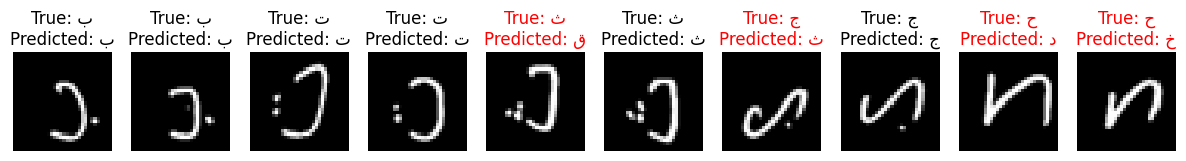

In [ ]:
#Second expiremnent
#KNN

k_vals = [2,3, 4, 5, 6,7,8,9,10,11,12,13,14]

kF1 = []
total_accuracies = []
for k in k_vals:
      correct = 0
      no_of_instances = 0
      modelknn = KNeighborsClassifier(n_neighbors=k)
      modelknn.fit(ImgTraining, LabelTraining.ravel())
      pred = modelknn.predict(ImgValidation)
      correct = np.sum(pred == LabelValidation.ravel())
      no_of_instances = len(LabelValidation.ravel())
      accuracy = correct / no_of_instances
      total_accuracies.append(accuracy)
      AllTKNN, AllFPKNN, AllFNKNN, mtrxxx = conMatrix(LabelValidation.ravel(), pred)
      f = F1(AllTKNN, AllFPKNN, AllFNKNN)
      kF1.append(f)

plt.plot(k_vals, kF1)
plt.xlabel('K Values')
plt.ylabel('Average F1 Score')
plt.grid(True)
plt.show()

print("Best K value is 8.")


Average_Accuracies = sum(total_accuracies)/len(total_accuracies)
print()
Average_Accuracies = round(Average_Accuracies * 100, 2)
print(f"Average Accuracies: {Average_Accuracies}%")

#Test the model with best-k value

modelknn = KNeighborsClassifier(n_neighbors=8)
modelknn.fit(ImgTraining, LabelTraining.ravel())
pred2 = modelknn.predict(test_images)
AllTKNN, AllFPKNN, AllFNKNN, mtrxx = conMatrix(test_labels.ravel(), pred2)
print("Confusion matrix for the best K value:")
print(mtrxx)
f2 = F1(AllTKNN, AllFPKNN, AllFNKNN)
print("F1 score of KNN", f2*100, "%")

display_images(test_images, test_labels, pred2)


For the first Neural Network Model:
Epoch 1/10
378/378 [==============================] - 7s 15ms/step - loss: 2.1259 - accuracy: 0.3437 - val_loss: 1.5226 - val_accuracy: 0.4926
Epoch 2/10
378/378 [==============================] - 5s 12ms/step - loss: 1.1424 - accuracy: 0.6066 - val_loss: 1.0999 - val_accuracy: 0.6213
Epoch 3/10
378/378 [==============================] - 4s 9ms/step - loss: 0.7834 - accuracy: 0.7291 - val_loss: 0.9647 - val_accuracy: 0.6749
Epoch 4/10
378/378 [==============================] - 3s 9ms/step - loss: 0.5907 - accuracy: 0.7939 - val_loss: 0.8807 - val_accuracy: 0.7150
Epoch 5/10
378/378 [==============================] - 2s 5ms/step - loss: 0.4438 - accuracy: 0.8476 - val_loss: 0.8053 - val_accuracy: 0.7411
Epoch 6/10
378/378 [==============================] - 3s 8ms/step - loss: 0.3577 - accuracy: 0.8755 - val_loss: 0.8446 - val_accuracy: 0.7314
Epoch 7/10
378/378 [==============================] - 3s 8ms/step - loss: 0.2823 - accuracy: 0.9048 - val_loss

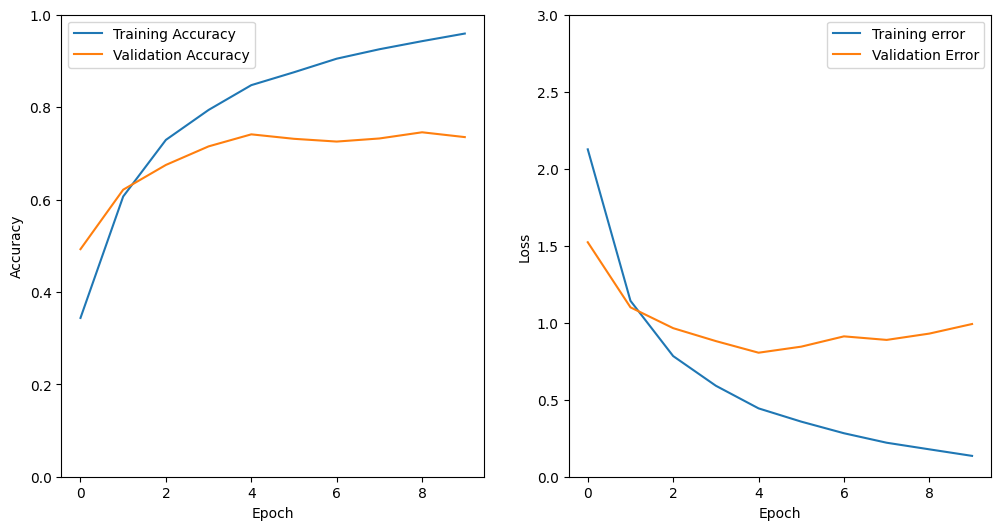

For the second Neural Network Model:
Epoch 1/10
378/378 [==============================] - 3s 6ms/step - loss: 2.6166 - accuracy: 0.2563 - val_loss: 2.2423 - val_accuracy: 0.3266
Epoch 2/10
378/378 [==============================] - 2s 6ms/step - loss: 2.0711 - accuracy: 0.3906 - val_loss: 2.0269 - val_accuracy: 0.3891
Epoch 3/10
378/378 [==============================] - 3s 7ms/step - loss: 1.8630 - accuracy: 0.4580 - val_loss: 1.9290 - val_accuracy: 0.4263
Epoch 4/10
378/378 [==============================] - 3s 9ms/step - loss: 1.7010 - accuracy: 0.4987 - val_loss: 1.7890 - val_accuracy: 0.4635
Epoch 5/10
378/378 [==============================] - 3s 7ms/step - loss: 1.5459 - accuracy: 0.5432 - val_loss: 1.7007 - val_accuracy: 0.5000
Epoch 6/10
378/378 [==============================] - 2s 6ms/step - loss: 1.3921 - accuracy: 0.5938 - val_loss: 1.5863 - val_accuracy: 0.5156
Epoch 7/10
378/378 [==============================] - 2s 6ms/step - loss: 1.2575 - accuracy: 0.6290 - val_loss:

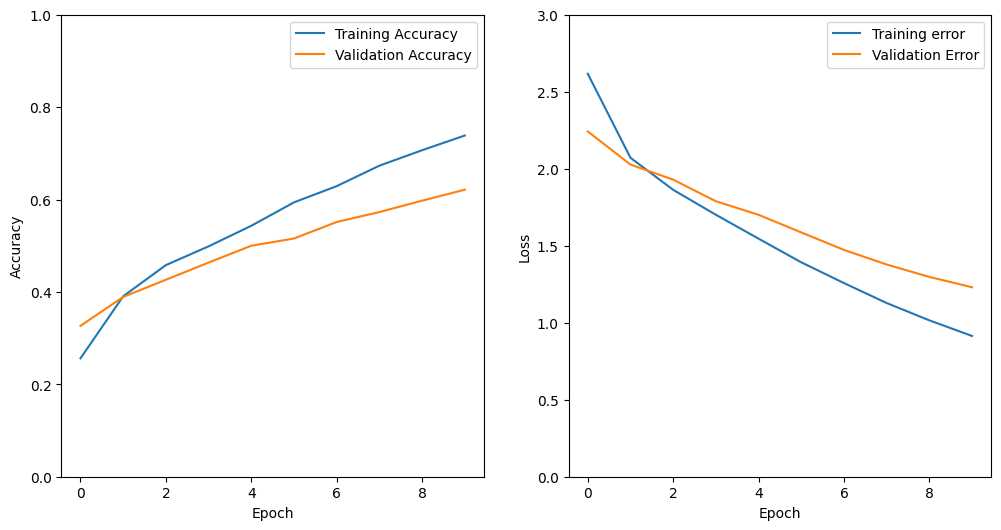

Model 1 is better.
The best model is NN1 with a value of 73.51


In [ ]:
#Third expirement
#Neural networks

# Preprocess data (reshaping)
ImgTraining = ImgTraining.reshape((12096, 32, 32, 1))
ImgValidation = ImgValidation.reshape((1344, 32, 32, 1))

# One-hot encode the labels
LabelTraining = tf.keras.utils.to_categorical(LabelTraining - 1, num_classes=number_of_classes)
LabelValidation = tf.keras.utils.to_categorical(LabelValidation - 1, num_classes=number_of_classes)

# FIRST MODEL
model1 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("For the first Neural Network Model:")
history1 = model1.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for model1
test_loss1, test_acc1 = model1.evaluate(ImgValidation, LabelValidation)
test_acc1 = round(test_acc1 * 100, 2)
print('\nTest accuracy for model 1:', test_acc1, "%")

# Plot training accuracy and validation accuracy for model1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')  # Using a line plot with markers
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for model1
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training error')
plt.plot(history1.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()


# SECOND MODEL
model2 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 1)),
    layers.Dense(384, activation='sigmoid'),
    layers.Dense(number_of_classes, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("For the second Neural Network Model:")
history2 = model2.fit(ImgTraining, LabelTraining, epochs=10, validation_data=(ImgValidation, LabelValidation))

# Evaluate the model on the test data for model2
test_loss2, test_acc2 = model2.evaluate(ImgValidation, LabelValidation)
test_acc2 = round(test_acc2 * 100, 2)
print('\nTest accuracy:', test_acc2, "%")

# Plot training accuracy and validation accuracy for model1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])

# Plot training error and validation error for model1
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training error')
plt.plot(history2.history['val_loss'], label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()

# Choose the better model out of the two
if test_acc1 > test_acc2:
    print("Model 1 is better.")
    model1.save("best_model.keras")
else:
    print("Model 2 is better.")
    model2.save("best_model.keras")


# Compare the results of the models and suggest the best model.
best_parameter, best_value = max(
    [("Av", Av), ("f2", f2), ("test_acc1", test_acc1), ("test_acc2", test_acc2)],
    key=lambda x: x[1]
)

if (best_parameter == 'Av'):
    print(f"The best model is SVM with a value of {best_value}")
elif (best_parameter == 'f2'):
    print(f"The best model is KNN with a value of {best_value}")
elif (best_parameter == 'test_acc1'):
    print(f"The best model is NN1 with a value of {best_value}")
elif (best_parameter == 'test_acc2'):
    print(f"The best model is NN2 with a value of {best_value}")



105/105 [==============================] - 0s 2ms/step


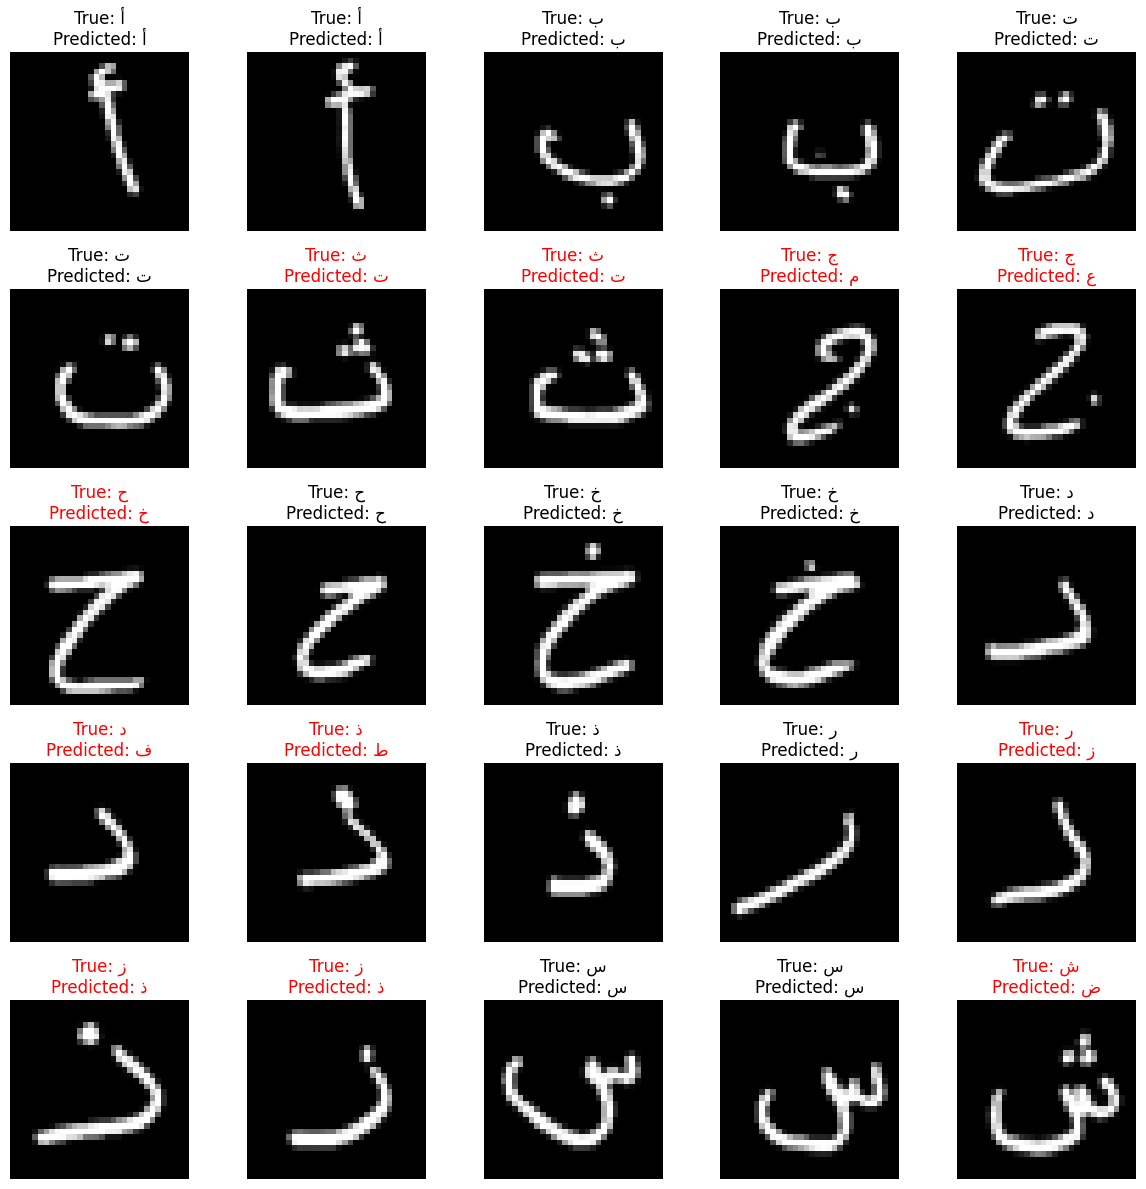

Accuracy: 74.38 %
Confusion Matrix:
[[117   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   1   0]
 [  0 102  10   0   0   2   0   0   1   0   0   2   0   1   0   0   0   0
    0   0   0   0   0   0   2   0   0   0]
 [  0   8  90  10   0   0   0   1   1   0   0   0   0   0   1   0   0   0
    0   3   3   1   0   0   2   0   0   0]
 [  0   3  33  77   0   0   0   1   1   0   0   0   1   0   1   0   0   0
    0   0   0   1   0   0   2   0   0   0]
 [  0   0   0   0  82  12   4   0   0   0   0   0   0   0   0   0   0  13
    0   0   0   2   0   4   0   1   2   0]
 [  0   0   0   0  33  56  12   0   0   0   0   0   0   0   0   0   0  17
    0   0   0   0   0   1   1   0   0   0]
 [  2   0   0   1   4   2  86   0   1   0   0   1   0   0   0   0   0  18
    4   0   0   0   0   1   0   0   0   0]
 [  1   0   1   0   0   0   1  97   7   2   2   0   0   0   0   1   0   1
    0   1   0   0   3   1   0   0   2   0]
 [  1   0   0   0   0   0   

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt



loaded_model = tf.keras.models.load_model("best_model.keras")

test_images = pd.read_csv("/content/drive/MyDrive/ML/csvTestImages 3360x1024.csv", header=None).values
test_labels = pd.read_csv("/content/drive/MyDrive/ML/csvTestLabel 3360x1.csv", header=None).values

class_names = ['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']

# Preprocess data (reshaping)
test_images = test_images.reshape((3360, 32, 32, 1))

# normalization
test_images = test_images / 255

# One-hot encode the labels
number_of_classes = len(class_names)
test_labels = tf.keras.utils.to_categorical(test_labels - 1, num_classes=number_of_classes)


predictions = loaded_model.predict(test_images)

# Convert one-hot encoded predictions & true labels back to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)


def display_predicted_images(images, true_labels, predicted_labels, class_names, num_rows=5, num_cols=5):
    plt.figure(figsize=(12, 12))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)

        # Rotate the image 90 degrees to the right
        rotated_image = np.rot90(images[i].reshape((32, 32)), k=1)

        # Flip the rotated image
        flipped_rotated_image = np.flipud(rotated_image)
        plt.imshow(flipped_rotated_image, cmap='gray')
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]

        title = f'True: {true_label}\nPredicted: {predicted_label}'
        # Highlight in red if the prediction is incorrect
        plt.title(title, color='black' if true_label == predicted_label else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predicted_images(test_images, true_labels, predicted_labels, class_names)



#Accuracy
accuracy = np.sum(predicted_labels == true_labels) / len(true_labels)
accuracy = round(accuracy * 100, 2)
print("Accuracy:", accuracy, "%")

# confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# f1 scores
class_report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)
f1_scores = [class_report[class_name]['f1-score'] for class_name in class_names]
average_f1 = sum(f1_scores) / len(f1_scores)
print("Average F1 Score:", average_f1*100, "%")